In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data = pd.read_csv("cardio_train.csv", sep=";")

In [132]:
def df_info(df):
    df.shape
    df.info()
    print(df.head())

In [133]:
df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90

In [134]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [135]:
data.rename(columns={'ap_hi': 'systolic_bp', 'ap_lo': 'diastolic_bp', 'gluc': 'glucose', 'alco': 'alcohol', 'active': 'physical_activity', 'cardio': 'cardio_disease'}, inplace=True)

In [136]:
def remove_outliers(df, column, lower_threshold=None, upper_threshold=None):
    print(f'{column} - Size before removing outliers: {df.shape}')
    if lower_threshold:
        df = df[df[column] >= lower_threshold]
    if upper_threshold:
        df = df[df[column] <= upper_threshold]
    print(f'{column} -Size after removing outliers: {df.shape}')
    
    return df

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   age                70000 non-null  int64  
 2   gender             70000 non-null  int64  
 3   height             70000 non-null  int64  
 4   weight             70000 non-null  float64
 5   systolic_bp        70000 non-null  int64  
 6   diastolic_bp       70000 non-null  int64  
 7   cholesterol        70000 non-null  int64  
 8   glucose            70000 non-null  int64  
 9   smoke              70000 non-null  int64  
 10  alcohol            70000 non-null  int64  
 11  physical_activity  70000 non-null  int64  
 12  cardio_disease     70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [138]:
data.describe()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cardio_disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
data['age'] = data['age'].apply(lambda x: x / 365,25).astype('int16')
data['age']

C:\Users\aubin\AppData\Local\Temp\ipykernel_17276\503987341.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  data['age'] = data['age'].apply(lambda x: x / 365,25).astype('int16')


0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int16

In [140]:
data["BMI"] = data["weight"] / (data["height"]/100)**2  
data["BMI"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64

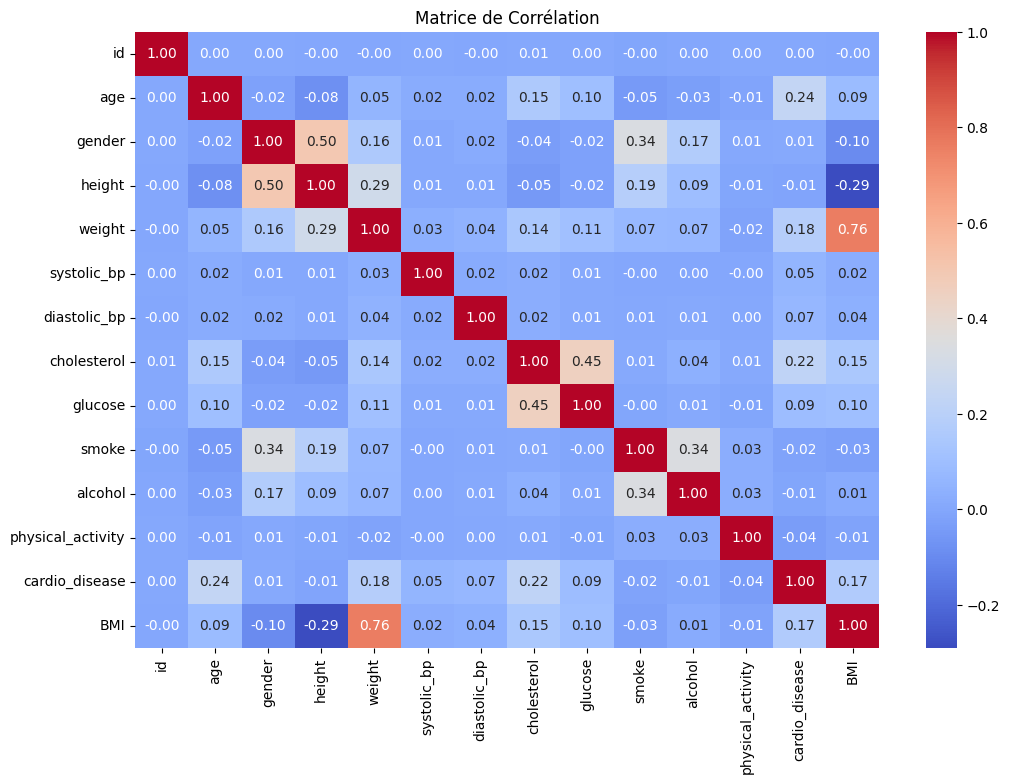

In [141]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [142]:
data["gender"] = data["gender"].map({1: "woman", 2: "man"})
data["cholesterol"] = data["cholesterol"].map({1: "normal", 2: "above normal", 3: "well above normal"})
data["glucose"] = data["glucose"].map({1: "normal", 2: "above normal", 3: "well above normal"})
data["smoke"] = data["smoke"].map({0: "no", 1: "yes"})
data["alcohol"] = data["alcohol"].map({0: "no", 1: "yes"})
data["physical_activity"] = data["physical_activity"].map({0: "no", 1: "yes"})
data["cardio_disease"] = data["cardio_disease"].map({0: "no", 1: "yes"})

In [143]:
data.describe()

,id,age,height,weight,systolic_bp,diastolic_bp,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414,27.556513
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530,6.091511
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,3.471784
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000,26.374068
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000,30.222222
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,298.666667


In [144]:
categorical = data[["gender", "cholesterol", "glucose", "smoke", "alcohol", "physical_activity"]]
numerical = data[["age", "height", "weight", "systolic_bp", "diastolic_bp", "BMI"]]

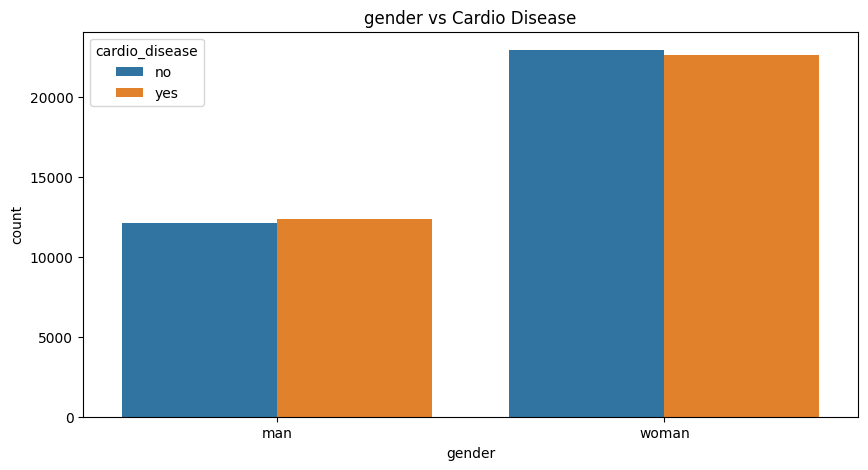

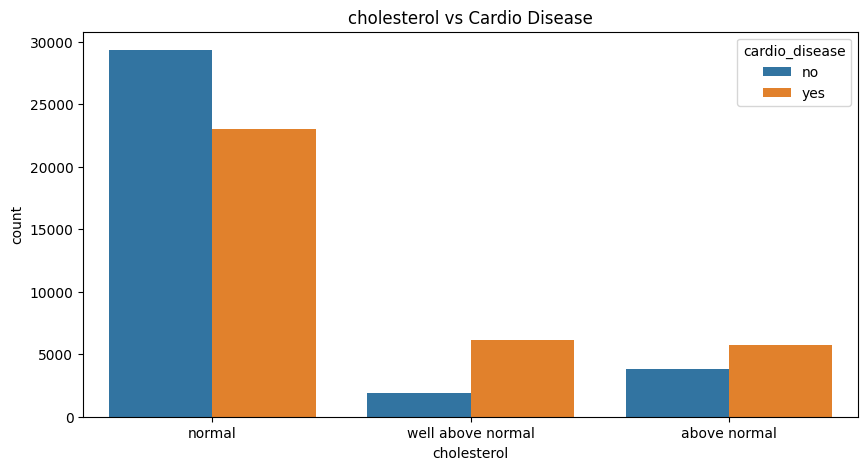

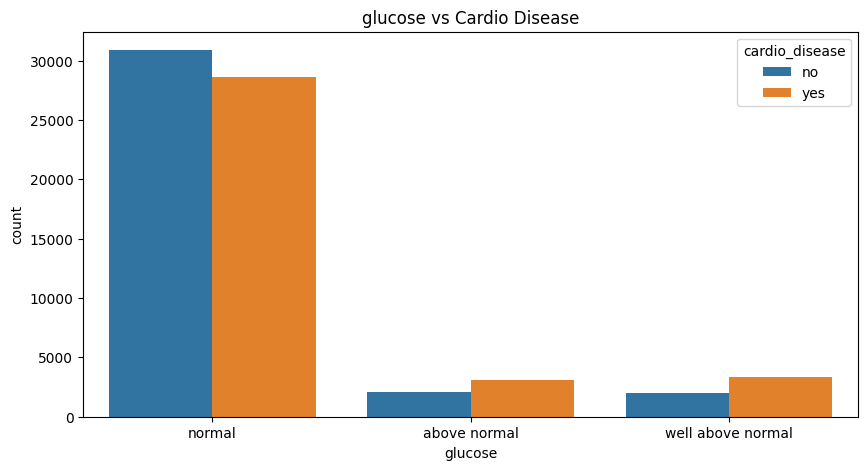

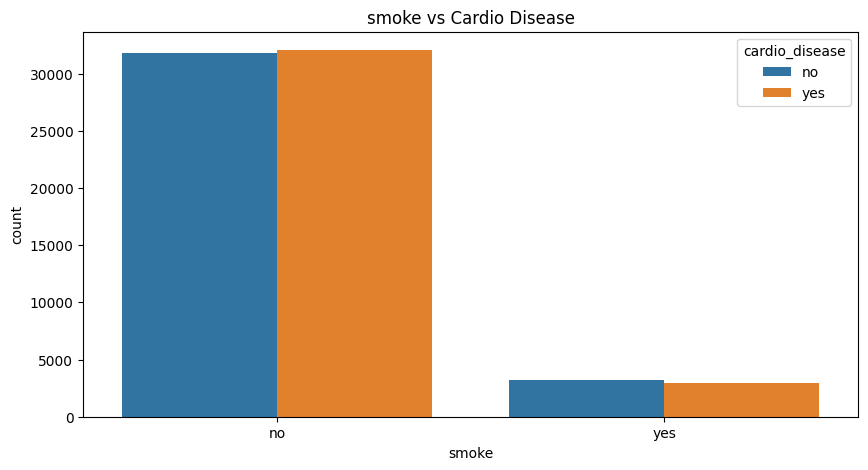

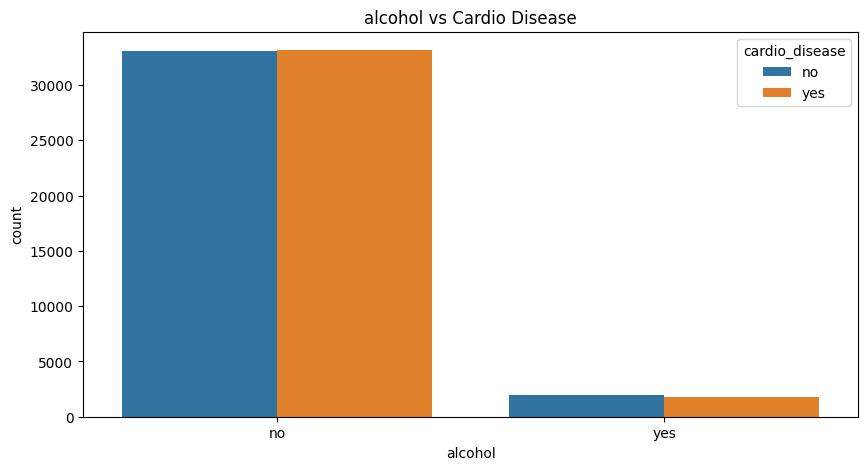

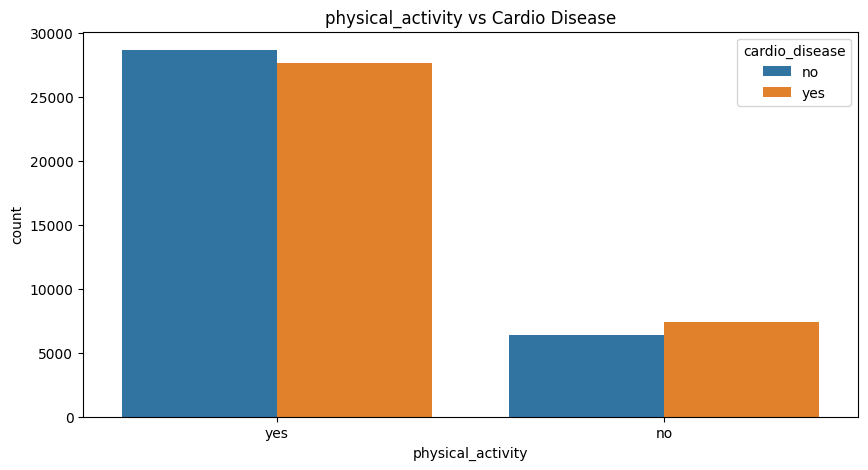

In [145]:
for column in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column, hue='cardio_disease')
    plt.title(f'{column} vs Cardio Disease')
    plt.show()

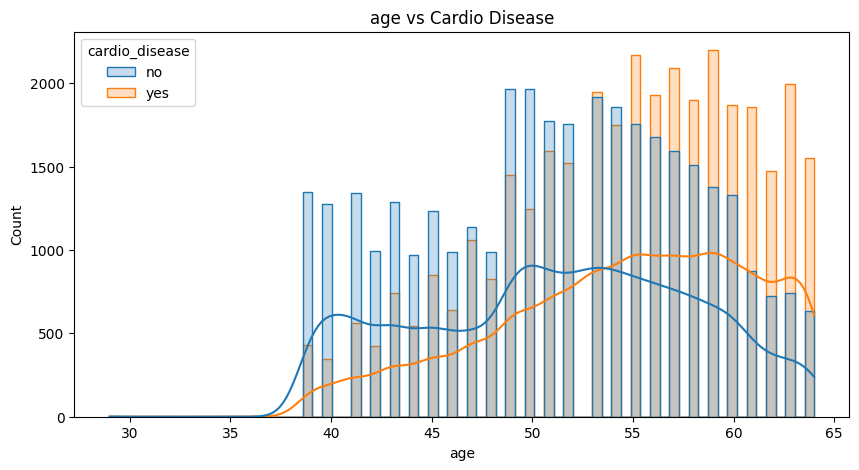

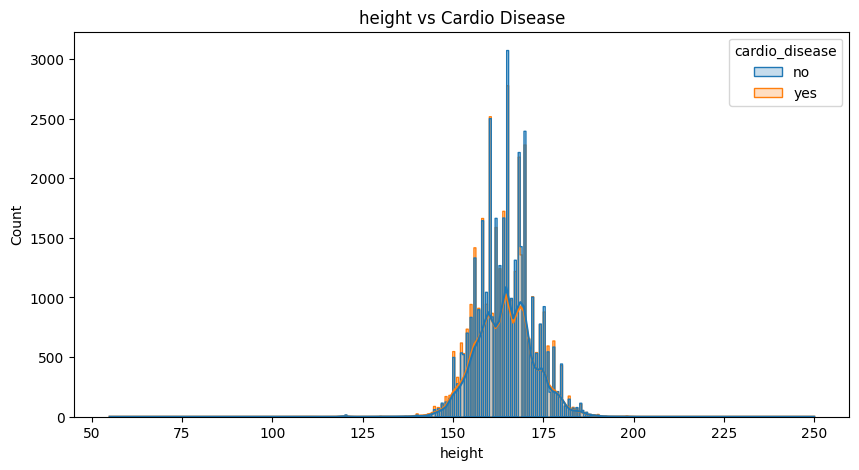

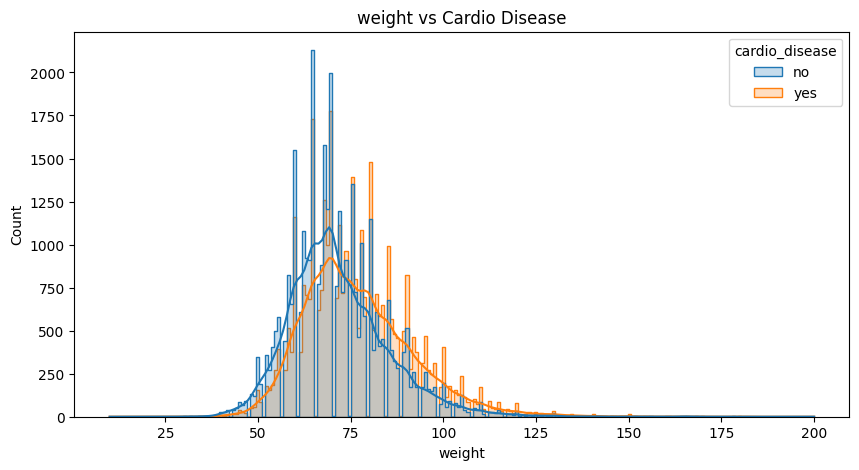

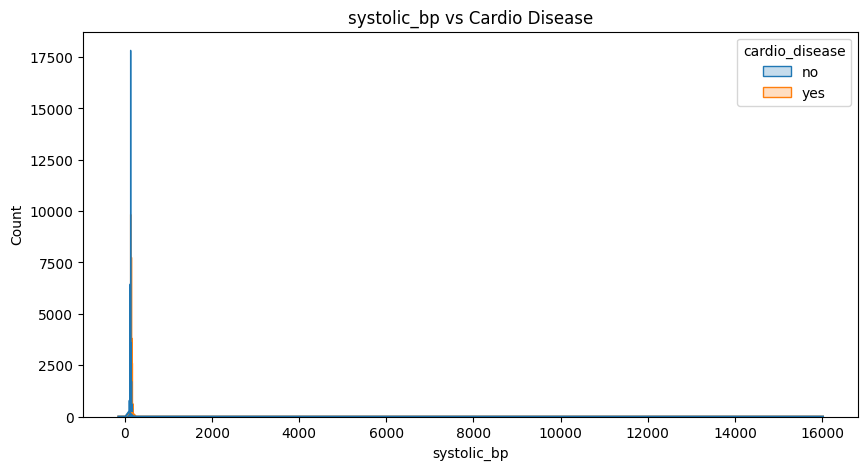

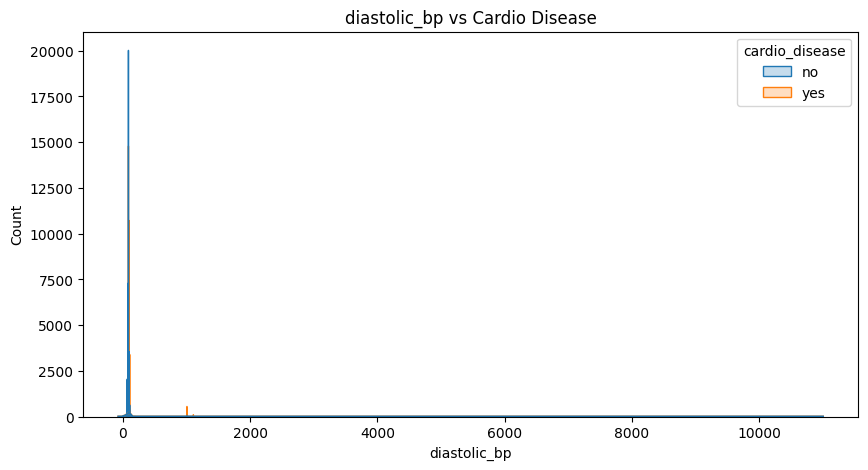

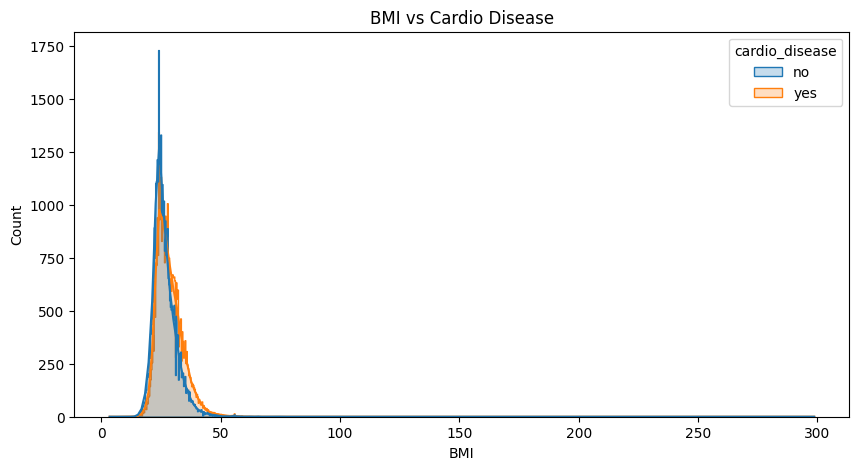

In [146]:
for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=column, hue='cardio_disease', kde=True, element='step')
    plt.title(f'{column} vs Cardio Disease')
    plt.show()

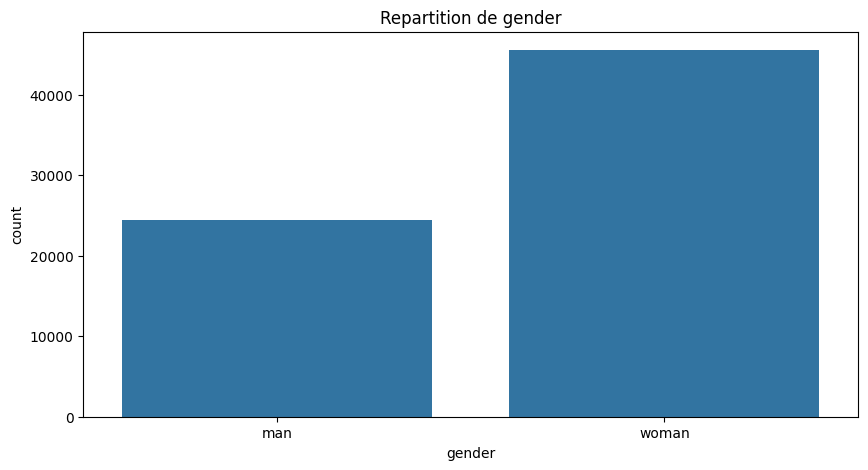

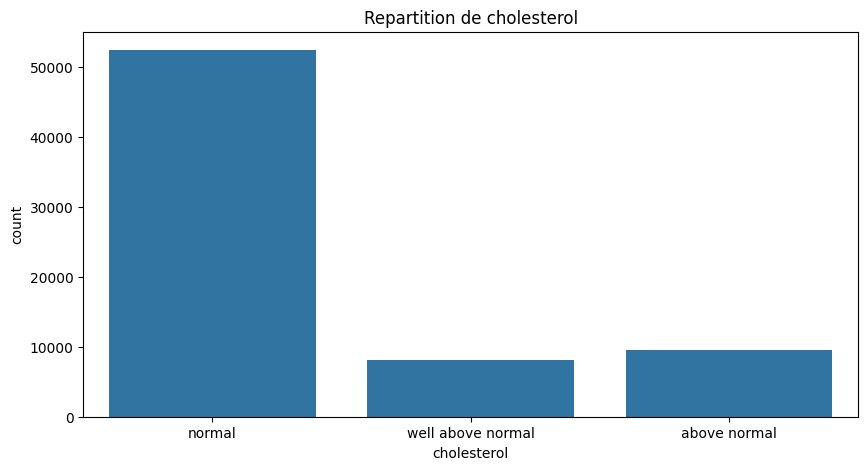

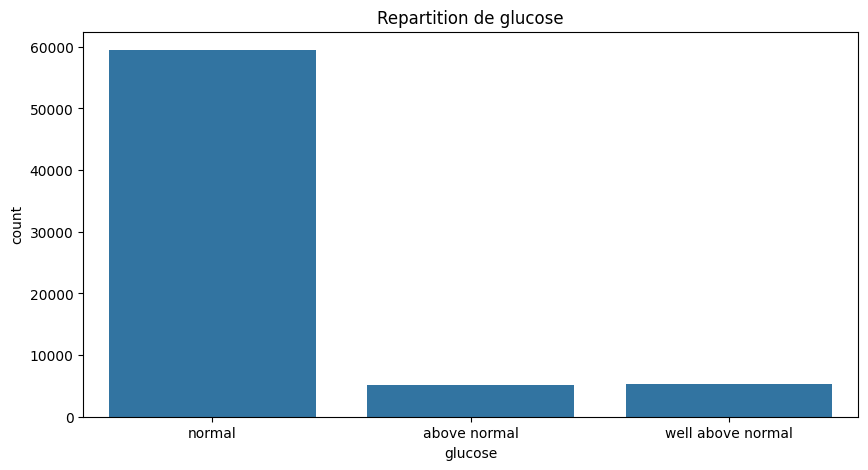

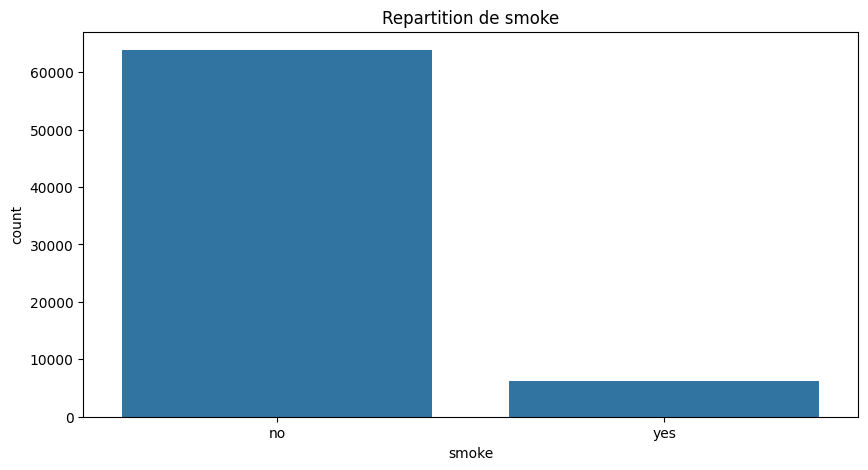

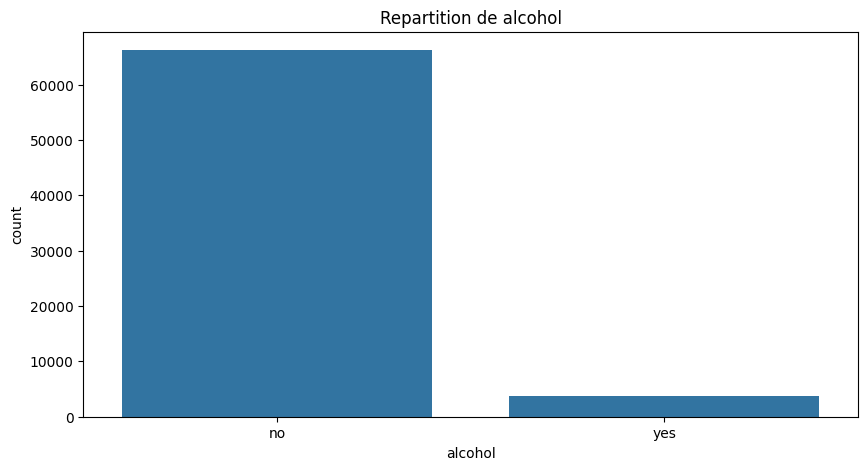

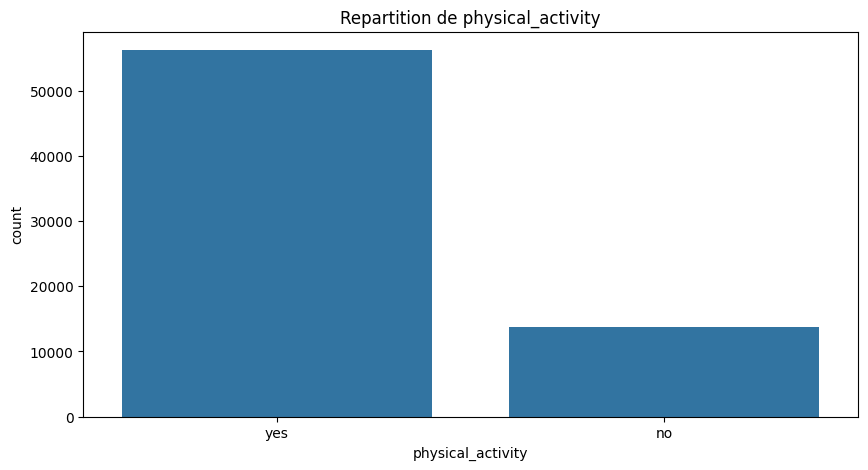

In [147]:
for column in categorical.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=categorical, x=column)
    plt.title(f'Repartition de {column}')
    plt.show()

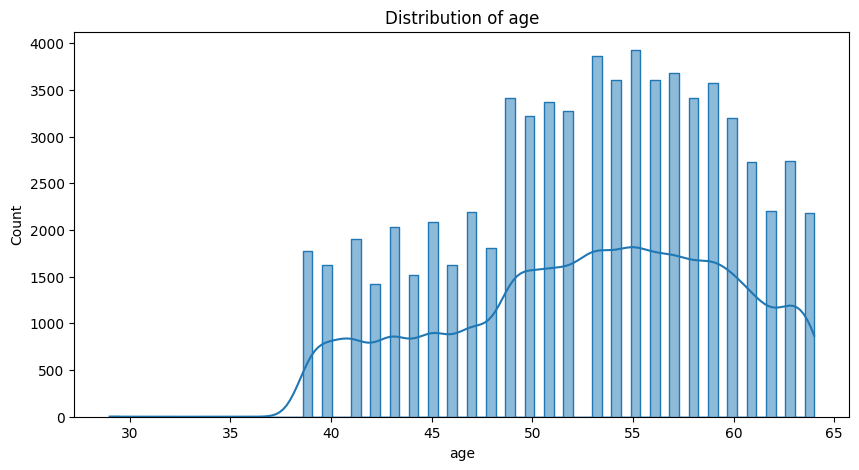

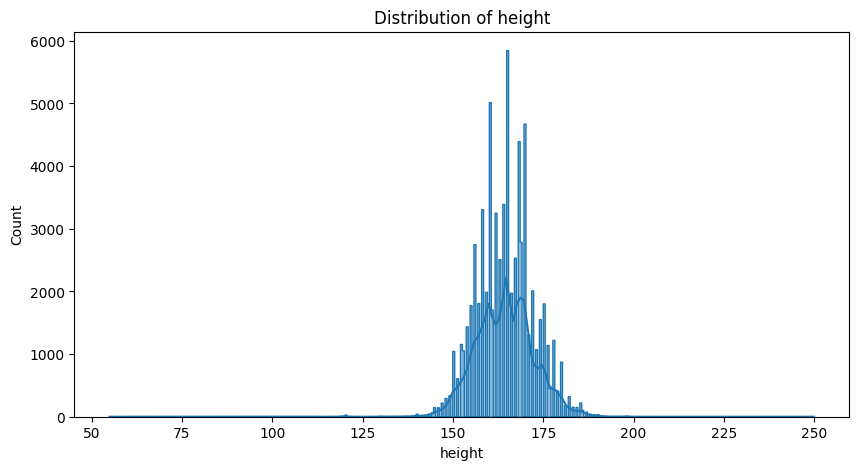

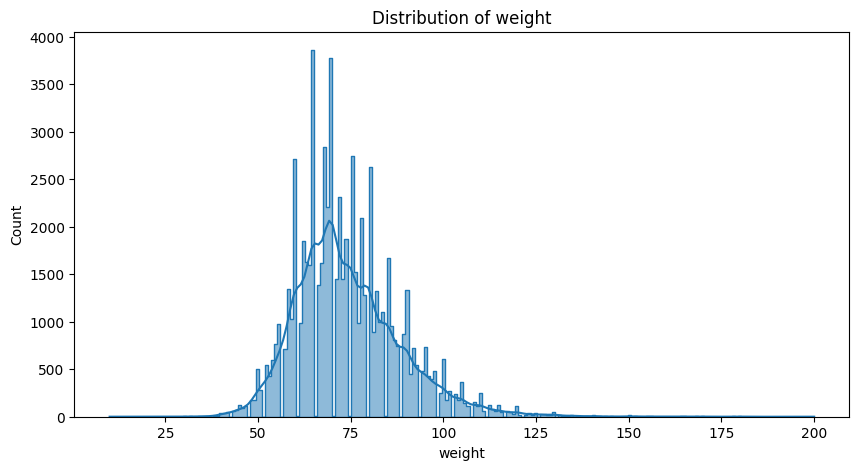

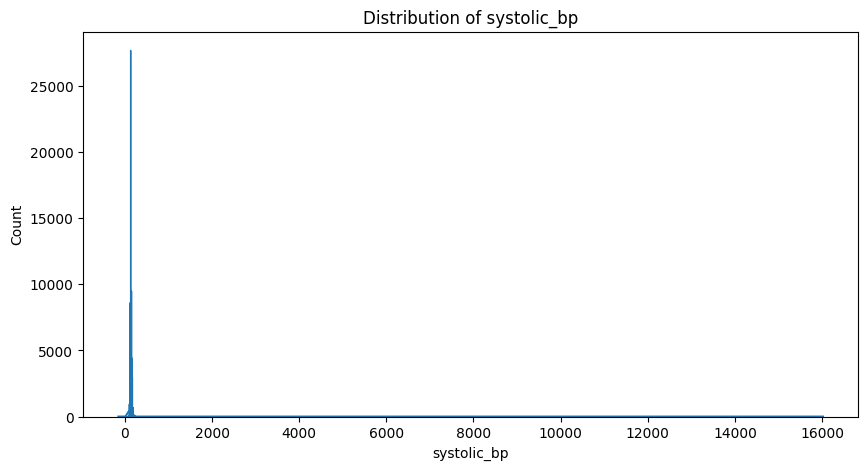

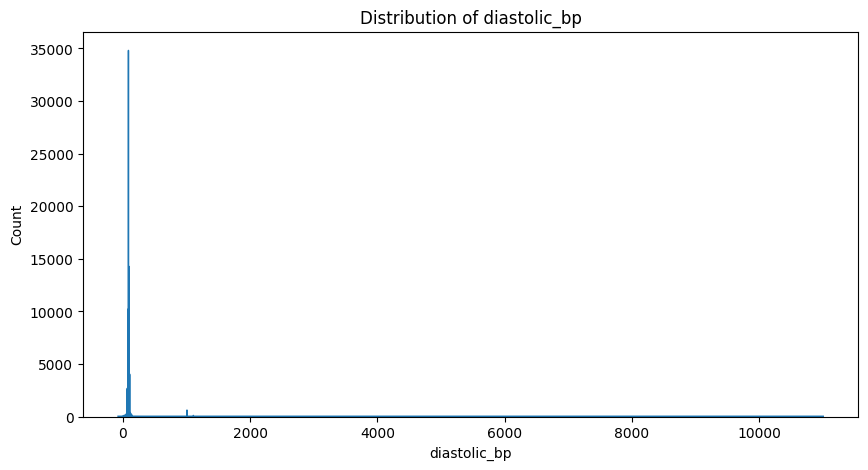

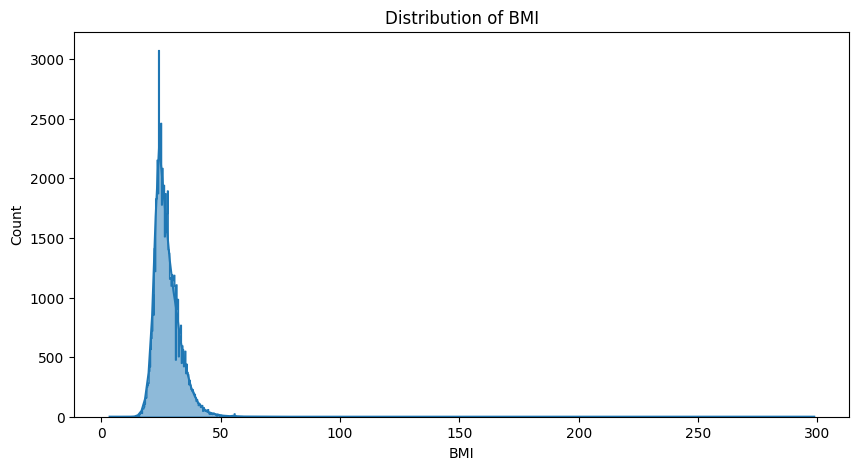

In [148]:
for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=column, kde=True, element='step')
    plt.title(f'Distribution of {column}')
    plt.show()

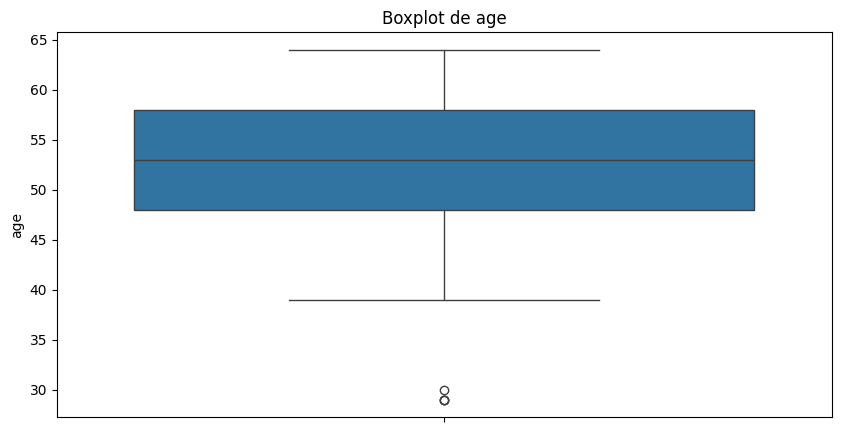

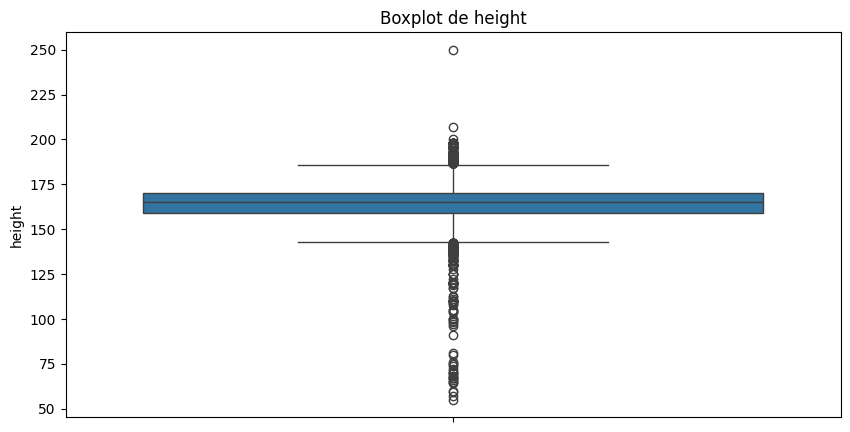

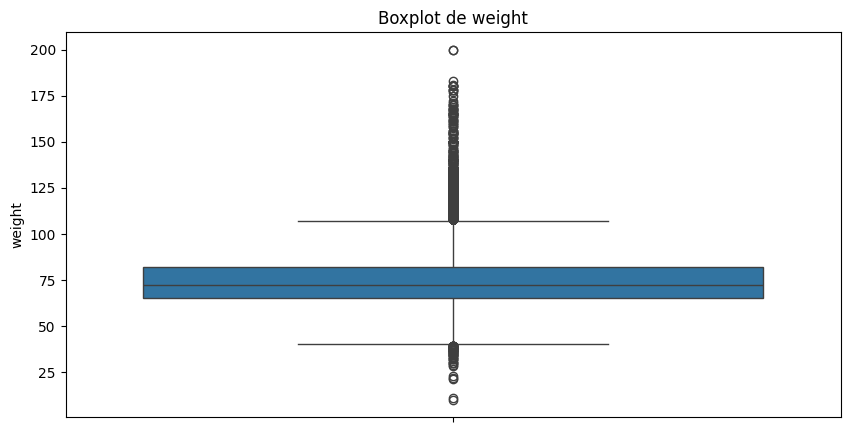

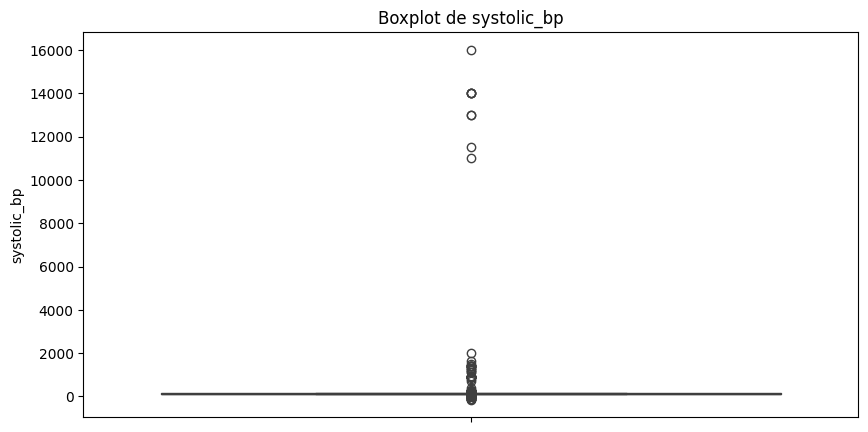

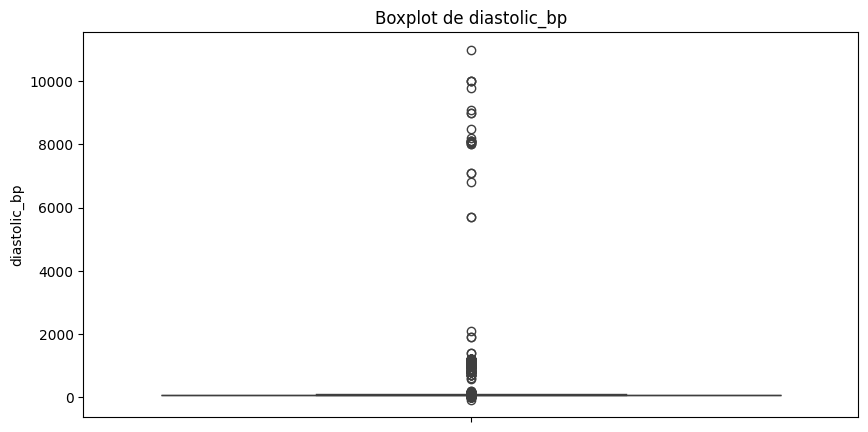

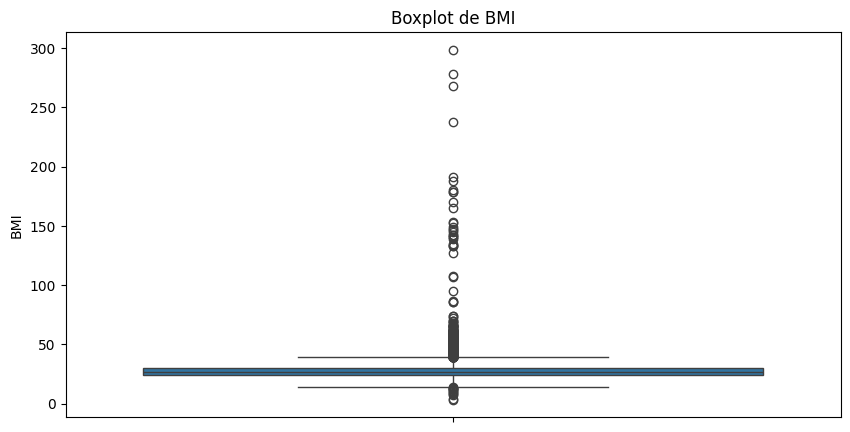

In [149]:
for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=numerical[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

systolic_bp - Size before removing outliers: (70000, 14)
systolic_bp -Size after removing outliers: (67883, 14)
diastolic_bp - Size before removing outliers: (67883, 14)
diastolic_bp -Size after removing outliers: (66975, 14)
BMI - Size before removing outliers: (66975, 14)
BMI -Size after removing outliers: (66752, 14)


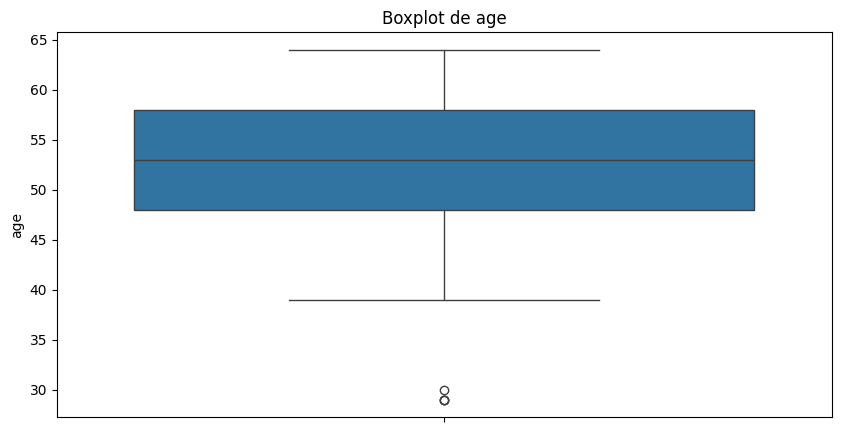

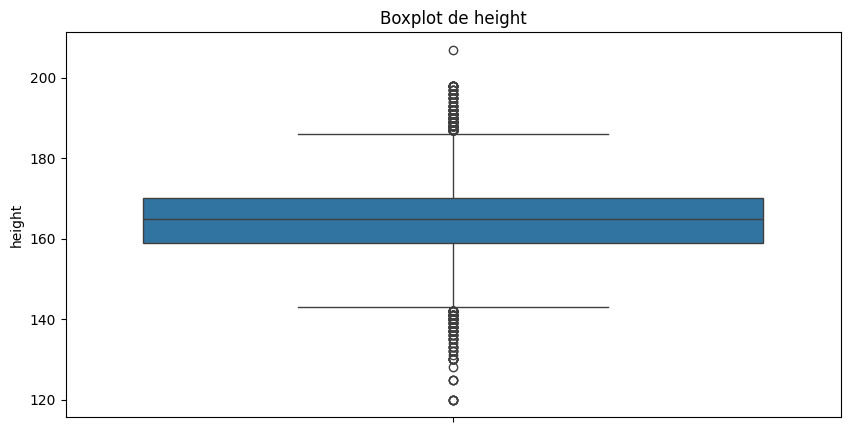

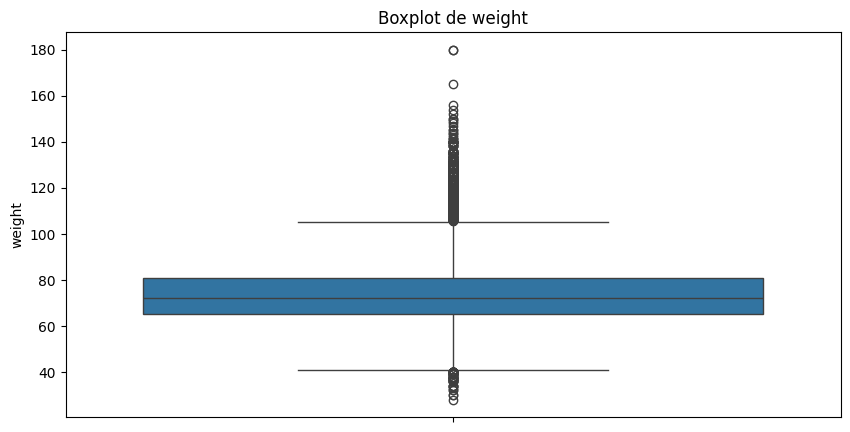

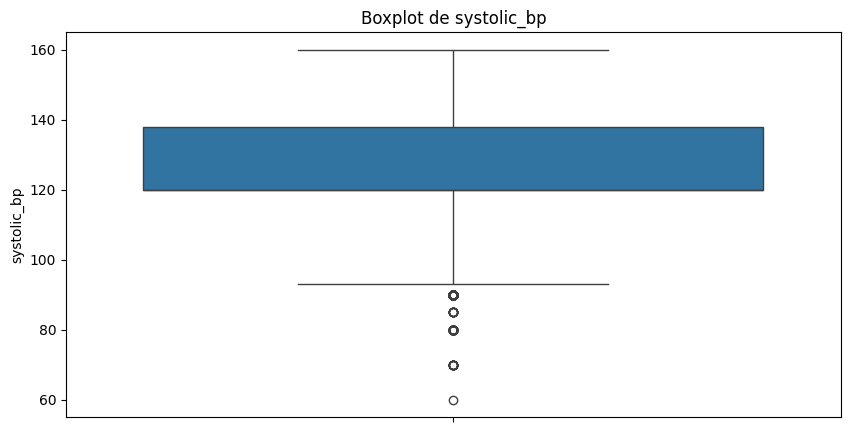

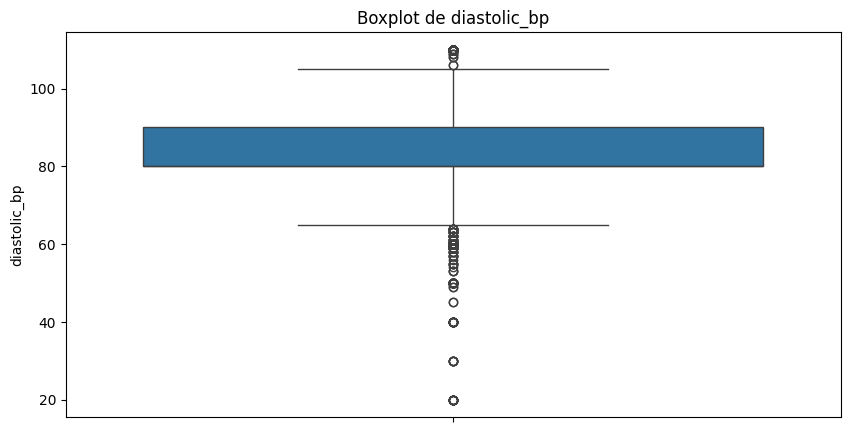

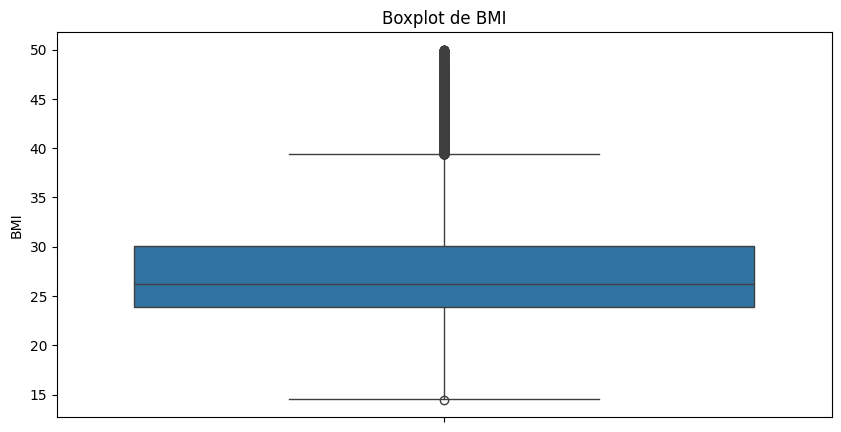

In [150]:
no_outliers_data = data.copy()
# no_outliers_data = remove_outliers(no_outliers_data, 'height', 130, 210)
# no_outliers_data = remove_outliers(no_outliers_data, 'weight', 30, 150)
no_outliers_data = remove_outliers(no_outliers_data, 'systolic_bp', 50, 160)
no_outliers_data = remove_outliers(no_outliers_data, 'diastolic_bp', 20, 110)
no_outliers_data = no_outliers_data.drop("BMI", axis=1)
no_outliers_data["BMI"] = no_outliers_data["weight"] / (no_outliers_data["height"]/100)**2
no_outliers_data = remove_outliers(no_outliers_data, 'BMI', 14, 50)

for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=no_outliers_data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [151]:
data.describe()

,id,age,height,weight,systolic_bp,diastolic_bp,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414,27.556513
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530,6.091511
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,3.471784
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000,26.374068
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000,30.222222
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,298.666667


In [152]:
no_outliers_data.describe()

,id,age,height,weight,systolic_bp,diastolic_bp,BMI
count,66752.000000,66752.000000,66752.000000,66752.000000,66752.000000,66752.000000,66752.000000
mean,49996.449020,52.766943,164.449125,73.749472,125.324410,80.811287,27.300683
std,28851.236153,6.776915,7.827071,13.788560,14.624218,8.893040,4.988737
min,0.000000,29.000000,120.000000,28.000000,60.000000,20.000000,14.479500
25%,24996.750000,48.000000,159.000000,65.000000,120.000000,80.000000,23.833005
50%,50061.500000,53.000000,165.000000,72.000000,120.000000,80.000000,26.259585
75%,74904.250000,58.000000,170.000000,81.000000,138.000000,90.000000,30.062102
max,99999.000000,64.000000,207.000000,180.000000,160.000000,110.000000,50.000000
